In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline


# 그래프 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
import os # 운영체제(operating system) 관련 패키지 호출

# 현재 작업 디렉토리 확인
os.getcwd()

# 작업 디렉토리 변경
os.chdir('c:/data/p_3')

In [5]:
# 데이터 불러오기
food = pd.read_csv('food_clean+remove_outlier_수정.csv')
food.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight
0,L003,A,주간,O8,26.4,42.9,0,양품,100.190255
1,L029,B,주간,O2,24.3,57.7,0,양품,98.952307
2,L035,A,주간,O4,23.5,44.3,0,양품,99.997581
3,L018,A,야간,O9,26.5,44.4,0,양품,100.536753
4,L020,B,주간,O9,27.2,55.9,1,인쇄불량,98.838464


## 공정능력분석

In [6]:
from statsmodels.stats.diagnostic import normal_ad
import capability_analysis
from capability_analysis import capability_analysis_normal
from capability_plot import plot_capability

In [7]:
food["sub"] = food.index // 5 + 1
food.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight,sub
0,L003,A,주간,O8,26.4,42.9,0,양품,100.190255,1
1,L029,B,주간,O2,24.3,57.7,0,양품,98.952307,1
2,L035,A,주간,O4,23.5,44.3,0,양품,99.997581,1
3,L018,A,야간,O9,26.5,44.4,0,양품,100.536753,1
4,L020,B,주간,O9,27.2,55.9,1,인쇄불량,98.838464,1


In [8]:
result = capability_analysis_normal(
    food, value_col = 'Weight',
    subgroup_col = 'sub',
    LSL = 98, USL = 102,
    within_method = 'range')

print(result)

                       Result
n                     396.000
mean                   99.994
stdev (overall)         0.878
sigma (within)          0.862
Cp                      0.774
Cpk                     0.771
Pp                      0.760
Ppk                     0.757
Z.bench (within)        2.313
Z.bench (overall)       2.271
PPM Observed        17676.768
PPM Within         999607.505
PPM Overall        999575.533


## 정규성 검정

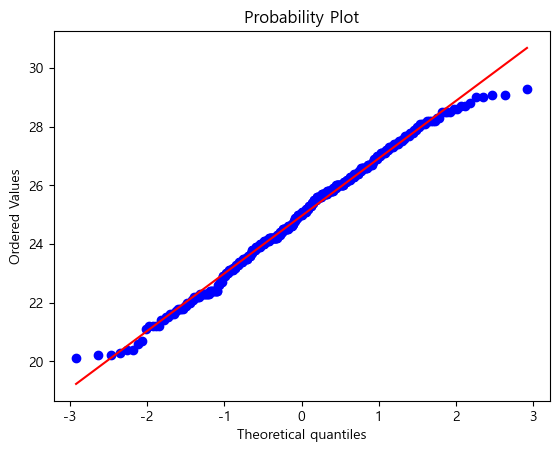

In [9]:
ad_food = normal_ad(food['Temp'])
ad_food

stats.probplot(food['Temp'], plot = plt)
plt.show()

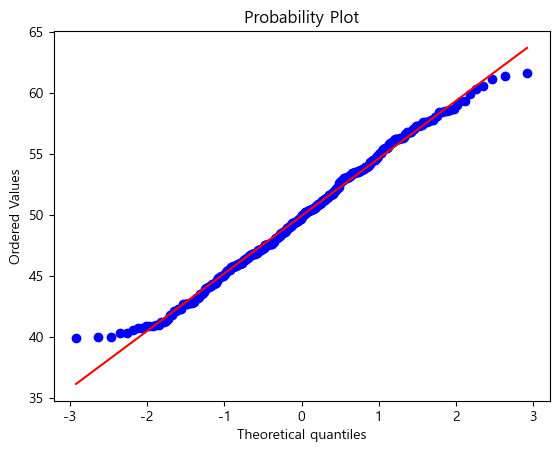

In [10]:
ad_food = normal_ad(food['Humidity'])
ad_food

stats.probplot(food['Humidity'], plot = plt)
plt.show()

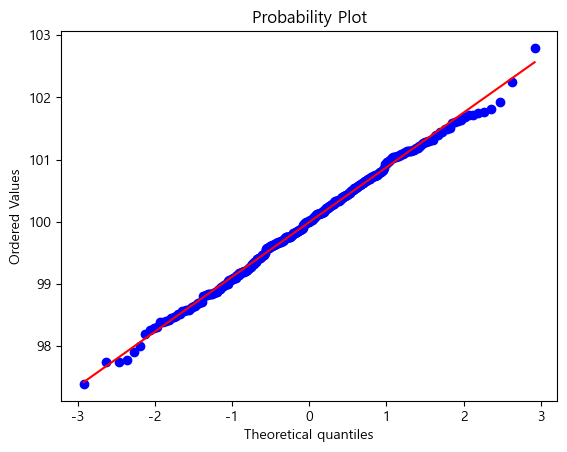

In [11]:
ad_food = normal_ad(food['Weight'])
ad_food

stats.probplot(food['Weight'], plot = plt)
plt.show()

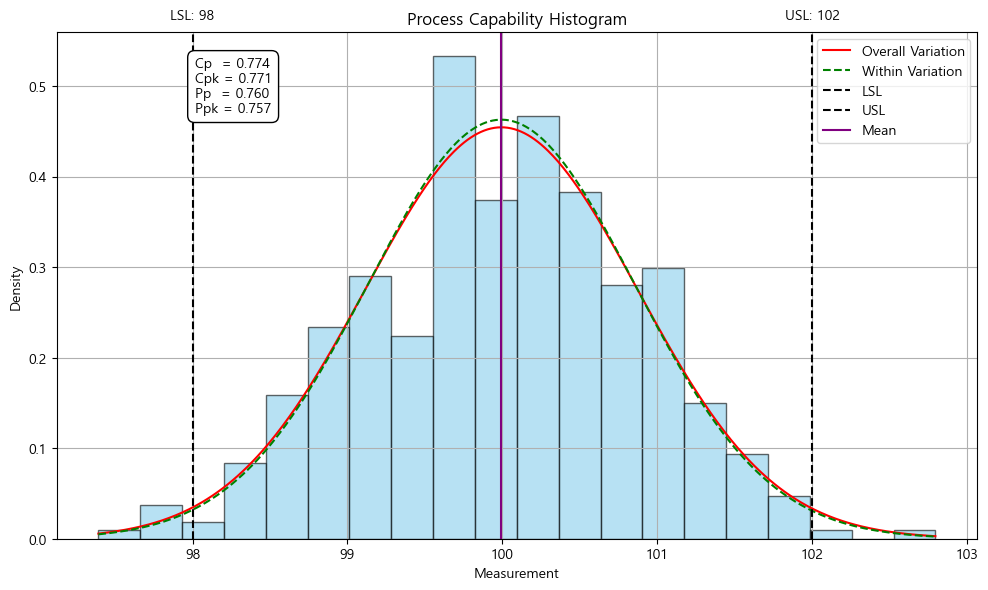

In [12]:
plot_capability(food, value_col = "Weight", LSL = 98, USL = 102, result = result)
plt.show()    

## 공정능력분석(후)

In [13]:
food_sam = pd.read_csv('food_sampling.csv')
food_sam.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight
0,L050,B,야간,O7,26.3,53.1,0,양품,100.318327
1,L016,A,주간,O4,26.1,53.3,0,양품,98.846931
2,L007,C,주간,O8,25.9,53.0,0,양품,99.753949
3,L002,B,주간,O4,27.0,52.9,0,양품,100.028765
4,L021,B,주간,O4,26.4,54.1,0,양품,100.388225


In [14]:
food_sam["sub"] = food_sam.index // 2 + 1
food_sam.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight,sub
0,L050,B,야간,O7,26.3,53.1,0,양품,100.318327,1
1,L016,A,주간,O4,26.1,53.3,0,양품,98.846931,1
2,L007,C,주간,O8,25.9,53.0,0,양품,99.753949,2
3,L002,B,주간,O4,27.0,52.9,0,양품,100.028765,2
4,L021,B,주간,O4,26.4,54.1,0,양품,100.388225,3


In [15]:
result = capability_analysis_normal(
    food_sam, value_col = 'Weight',
    subgroup_col = 'sub',
    LSL = 98, USL = 102,
    within_method = 'range')

print(result)

                       Result
n                      16.000
mean                   99.926
stdev (overall)         0.575
sigma (within)          0.583
Cp                      1.144
Cpk                     1.101
Pp                      1.159
Ppk                     1.116
Z.bench (within)        3.303
Z.bench (overall)       3.348
PPM Observed            0.000
PPM Within         999709.405
PPM Overall        999748.309


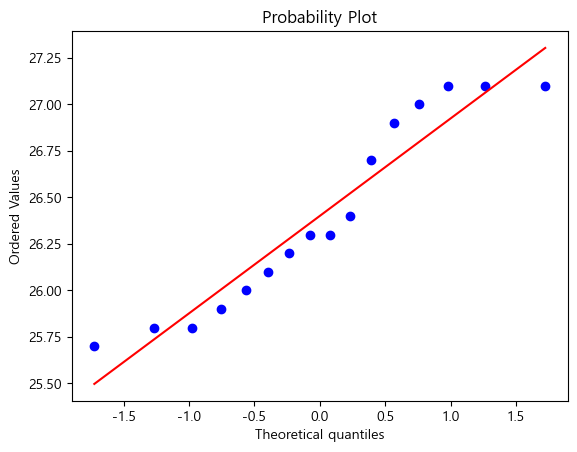

In [16]:
ad_food_sam = normal_ad(food_sam['Temp'])
ad_food_sam

stats.probplot(food_sam['Temp'], plot = plt)
plt.show()

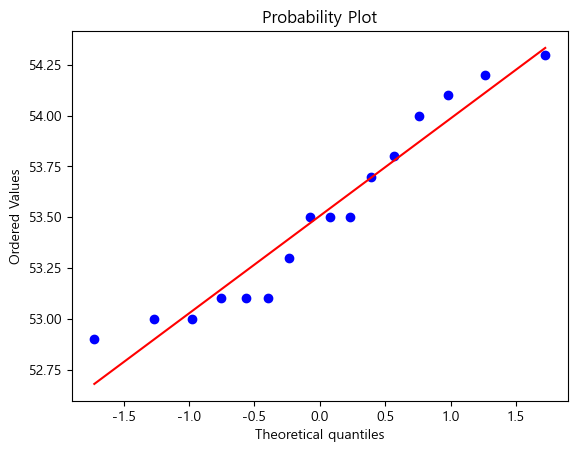

In [17]:
ad_food_sam = normal_ad(food_sam['Humidity'])
ad_food_sam

stats.probplot(food_sam['Humidity'], plot = plt)
plt.show()

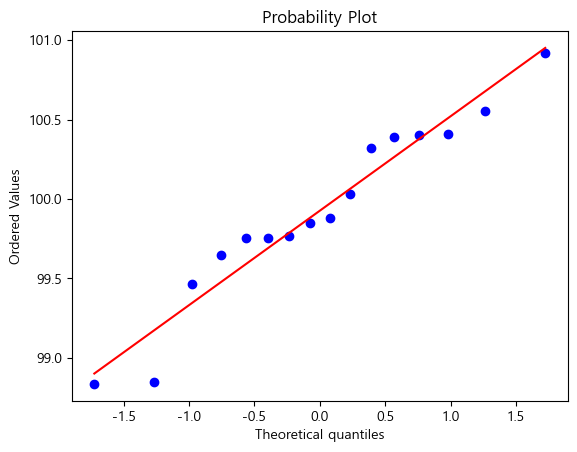

In [18]:
ad_food_sam = normal_ad(food_sam['Weight'])
ad_food_sam

stats.probplot(food_sam['Weight'], plot = plt)
plt.show()

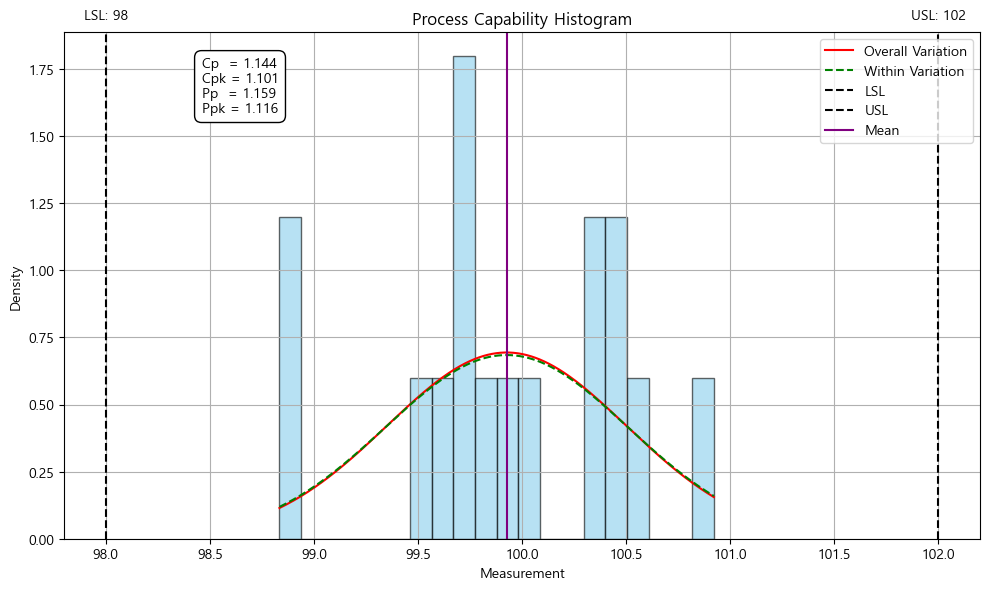

In [19]:
plot_capability(food_sam, value_col = "Weight", LSL = 98, USL = 102, result = result)
plt.show()    